<a href="https://colab.research.google.com/github/VS-Lucas/Supervised-learning/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Leitura do csv

In [62]:
df = pd.read_csv("drive/MyDrive/csvs/diabetes_prediction_dataset.csv")
columns = df.columns

Transformando valores categóricos em numéricos

In [73]:
target = ['gender', 'smoking_history']
for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

Normalizando o dataframe

In [65]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm, columns=columns)

In [74]:
x = dataset[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = dataset['diabetes']

Dividindo os dados em conjuntos de treinamento e teste

In [120]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/3, random_state=42)

Escolhendo números ímpares para evitar empates

In [116]:
kValues = [i for i in range(1, 50, 2)]

Validação cruzada visando evitar overfitting

In [121]:
kAccScores = []
for k in kValues:
  KNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  cvScores = cross_val_score(KNN, xTrain, yTrain, cv=5, scoring='accuracy')
  kAccScores.append(cvScores.mean())

In [122]:
optimalK = kValues[kAccScores.index(max(kAccScores))]

In [126]:
print(f'O k ótimo é: {optimalK}')

O k ótimo é: 11


Checando as acurácias



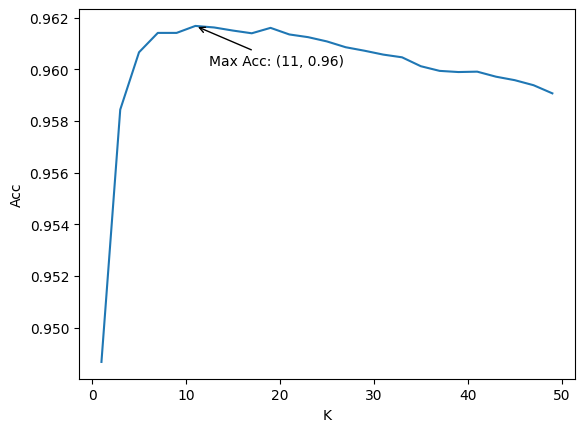

In [129]:
plt.plot(kValues, kAccScores)
plt.xlabel('K')
plt.ylabel('Acc')

max_y = np.max(kAccScores)
max_x = kValues[np.argmax(kAccScores)]

plt.annotate(f'Max Acc: ({max_x}, {max_y:.2f})', xy=(kValues[kAccScores.index(max_y)], max_y), xytext=(10, -20), textcoords='offset points', ha='left', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

Matriz de confusão usando o k ótimo

In [130]:
KNN = KNeighborsClassifier(n_neighbors=11).fit(xTrain, yTrain)
yPredKNN = KNN.predict(xTest)

In [131]:
accKNN = accuracy_score(yTest, yPredKNN)
accKNN

0.9620807583848323

Conclue-se que a classe 0 obteve uma boa taxa de acerto, o contrário da classe 1

In [132]:
confusion_matrix(yTest,yPredKNN)

array([[30468,    63],
       [ 1201,  1602]])